In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving uber.csv to uber.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['uber.csv']))
df.shape

(200000, 9)

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
def haversine (lon_1, lon_2, lat_1, lat_2):
  lon_1, lon_2, lat_1, lat_2=map(np.radians,[lon_1,lon_2,lat_1,lat_2])
  diff_lon=lon_2-lon_1
  diff_lat=lat_2-lat_1
  km=2*6371*np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +
                            np.cos(lat_1) * np.cos(lat_2)* np.sin(diff_lon/2.0)**2))
  return km

In [ ]:
df['Distance']=haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])

In [ ]:
df['Distance']=df['Distance'].astype(float).round(2)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


Text(0, 0.5, 'fare_amount')

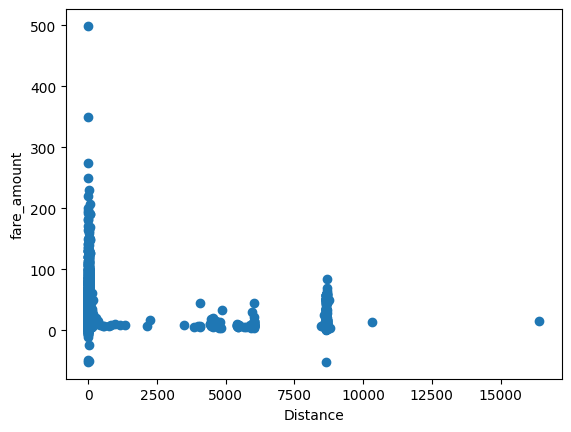

In [ ]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [ ]:
df.drop(df[df['Distance'] > 60].index,inplace=True)
df.drop(df[df['Distance']== 0].index,inplace=True)
df.drop(df[df['fare_amount']== 0].index,inplace=True)
df.drop(df[df['fare_amount']< 0].index,inplace=True)
df.shape

(193490, 10)

In [ ]:
df.drop(df[(df['fare_amount']>100)& (df['Distance']<1)].index, inplace=True)
df.drop(df[(df['fare_amount']<100)& (df['Distance']>100)].index, inplace=True)
df.shape


(193481, 10)

Text(0, 0.5, 'fare_amount')

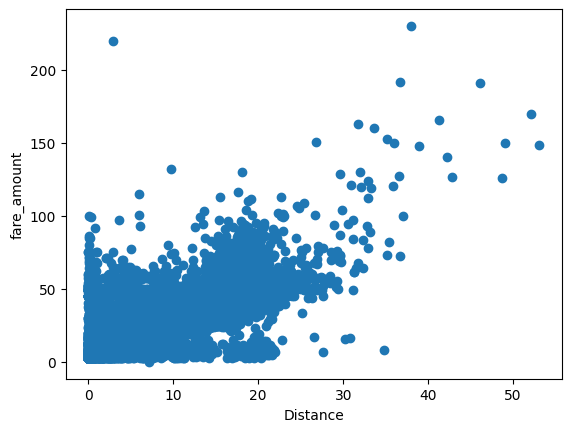

In [ ]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [ ]:
df2=pd.DataFrame().assign(fare=df['fare_amount'],Distance=df['Distance'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193481 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fare      193481 non-null  float64
 1   Distance  193481 non-null  float64
dtypes: float64(2)
memory usage: 4.4 MB


In [ ]:
df2.shape

(193481, 2)

<ipython-input-17-58f6b3881709>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['fare'],color='g',hist_kws=dict(edgecolor="black",linewidth=2),bins=30)


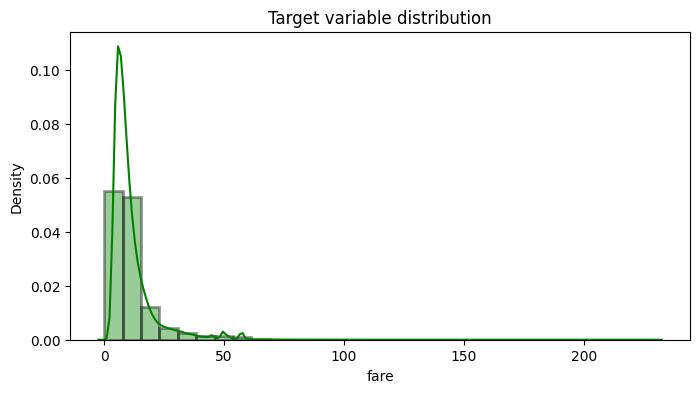

In [ ]:
plt.figure(figsize=[8,4])
sns.distplot(df2['fare'],color='g',hist_kws=dict(edgecolor="black",linewidth=2),bins=30)
plt.title('Target variable distribution')
plt.show()

Text(0, 0.5, 'fare_amount')

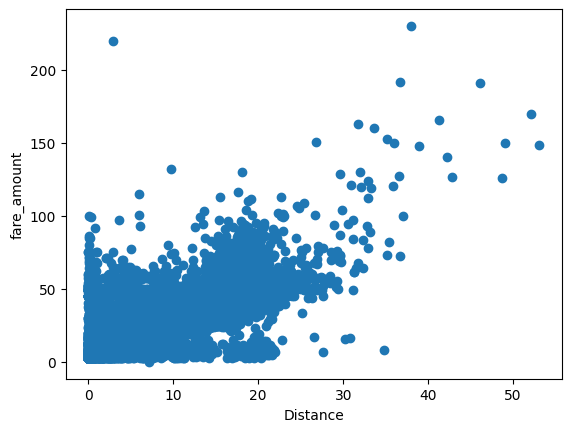

In [ ]:
plt.scatter(df2['Distance'],df2['fare'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")


In [ ]:
x=df2['fare']
y=df2['Distance']

In [ ]:
X=df2['Distance'].values.reshape(-1,1)
Y=df2['fare'].values.reshape(-1,1)


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std=std.fit_transform(Y)
x_std=std.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_std, y_std, test_size=0.2, random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
l_reg =LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=l_reg.predict(X_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root MEan Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute error: 0.23979020298617273
Mean Squared Error: 0.19845894128014688
Root MEan Squared Error: 0.4454873076532561


Text(0.5, 1.0, 'Fare vs Distance (Test Set)')

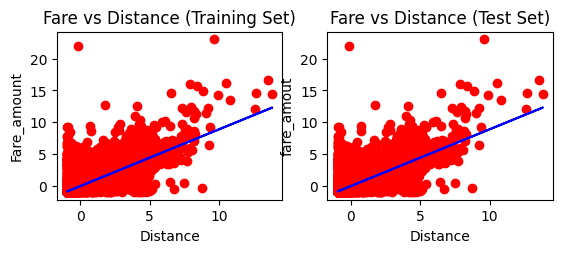

In [ ]:
plt.subplot(2 ,2 , 1)
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, l_reg.predict(X_train), color="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("Fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, l_reg.predict(X_train), color="blue")
plt.ylabel("fare_amout")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")